# Song Title Prediction from Hummed and Whistled Audio Using Classical and Deep Learning Pipelines


# 1 Author

**Student Name**:  Blazej Olszta
**Student ID**:  250585810



# 2 Problem formulation

This project investigates the task of **predicting the title of a song from a 10 second audio recording of a human hum or whistle**. The problem is formulated as a **multi-class audio classification task**, where each audio clip corresponds to a  interpretation of one of several possible songs included in the MLEnd Hums and Whistles II Dataset.

This task is **interesting and challenging** for several reasons:

- Whistling and humming create **weakly structured acoustic signals** that don't have the distinct rhythmic and harmonic patterns of instrumental or vocal music.  

- Depending on how each participant understood the original song, there is significant **variation in pitch stability, pace, articulation, and loudness** in the recordings.  

- The Variability is further increased by noise in the surroundings, variations in microphones, and the subjective character of humming.


These elements combine to produce an extremely difficult classification task that evaluates the efficacy of both deep learning and traditional machine learning techniques. This makes the job useful for investigating various modelling techniques and comprehending their advantages and disadvantages when used with imprecise, real world audio data.

---



# 3 Methodology

The overall methodology consists of designing, implementing, and comparing several machine learning pipelines for predicting song labels from short audio recordings. Each pipeline converts raw 10 second audio clips into numerical representations, trains a model to recognise song patterns, and evaluates performance on independent data splits.

### **Training Task**
The training task involves learning a mapping from audio features to song labels using supervised learning.  
During training:
- models optimise a classification loss function,
- accuracy is monitored,
- early stopping is applied for deep models to prevent overfitting.

### **Validation Task**
A separate validation set is used to:
- compare the performance of different pipelines,
- tune hyperparameters,
- monitor generalisation,
- choose the best performing model architecture.

Validation accuracy and validation loss are the main criteria for selecting the final model.

### **Testing Task**
After choosing the best pipeline, the model is **retrained on the combined training + validation data** to maximise learning.  
It is then evaluated once on a strictly **unseen test set**, providing a fair estimate of real-world performance.

### **Additional Supporting Tasks**
Several additional tasks were required to support the modelling process:
- **Audio resampling** to a consistent sampling rate.
- **Segmentation into 10-second chunks** (with padding where necessary).
- **Feature extraction**, either MFCC-based or mel-spectrogram-based.
- **Normalisation** of inputs for stability.
- **Label encoding** for model compatibility.
- **Group wise splitting** to avoid data leakage (ensuring chunks from the same recording do not appear in multiple sets).
- **Visualisation** of waveforms and spectrograms to understand data characteristics.

### **Evaluation Metrics**
To assess model performance, we used:
- **Accuracy** as the main metric,
- **Confusion matrices** to examine class wise performance,
- **Learning curves** to understand training dynamics and overfitting behaviour.

This structured methodology ensures that models are evaluated fairly, that data leakage is prevented, and that pipeline comparisons are meaningful and scientifically valid.

---


# 4 Implemented ML prediction pipelines

To address the challenging task of classifying hummed and whistled audio, I designed and implemented four distinct machine learning pipelines (Pipelines A-D). Each pipeline reflects a different modelling philosophy and explores an alternative representation of the audio signal. The aim is to systematically compare classical feature based approaches with modern deep learning methods and assess how each handles the high variability and weak structure inherent in humming and whistling.

All pipelines consist of the following conceptual stages:

1. **Input Stage** - A raw 10 second waveform sampled at 22,050 Hz.  
2. **Transformation Stage** - Feature extraction using either MFCC statistics or mel-spectrograms.  
3. **Model Stage** - A classifier or neural network trained to predict the song label.  
4. **Output Stage** - A discrete prediction from the set of possible song titles.

The pipelines are summarised as follows:

- **Pipeline A - Classical MFCC Pipeline**  
  Uses MFCCs and their temporal derivatives to form a compact statistical representation.  
  This pipeline establishes a conventional baseline and allows us to evaluate simple models such as Logistic Regression, SVMs, and Random Forests on structured features.

- **Pipeline B -  Extended Spectral Feature Pipeline**  
  Builds on Pipeline A by including chroma, spectral contrast, and other low level spectral features.  
  The motivation is to capture more detailed information about pitch, timbre, and spectral shape, which may be beneficial when MFCCs alone are insufficient.

- **Pipeline C -  Dense Neural Network on Mel-Spectrograms**  
  Converts the audio into 2D mel-spectrograms and trains a small fully connected network.  
  This pipeline tests whether a lightweight deep learning model can learn directly from richer time frequency representations.

- **Pipeline D - Transfer Learning CNN (MobileNetV2)**  
  Treats mel-spectrograms as images and feeds them into a pre-trained MobileNetV2 model with a custom classifier head.  
  This represents a modern approach where powerful, general purpose visual features are leveraged to compensate for the limited dataset size.

### Rationale for Using Multiple Pipelines
Using several contrasting pipelines enables a comprehensive investigation of the problem:

- Classical models test the effectiveness of engineered features.  
- Extended features reveal whether more spectral detail improves classification.  
- Neural networks test whether representation learning is feasible with low data volume.  
- Transfer learning explores whether deep convolutional features pre-trained on large scale data can generalise to this unusual audio domain.

This multi-pipeline strategy not only strengthens the robustness of the investigation but also supports informed model selection by revealing the strengths, weaknesses, and limitations of each approach under identical experimental conditions.


## 4.1 Transformation stage


The transformation stage converts raw audio waveforms into structured numerical representations suitable for machine learning.  
Because humming and whistling contain limited harmonic richness and high variability in pitch and intensity, the choice of feature representation is critical.  
Two complementary families of features were explored: **MFCC-based representations** for classical models and **mel-spectrograms** for deep learning models.

---

### **MFCC Based Features (Pipelines A and B)**

Mel-Frequency Cepstral Coefficients (MFCCs) are widely used in speech and audio processing because they approximate how humans perceive sound frequencies.  
MFCCs capture the broad spectral envelope of the audio signal and are particularly effective for non-musical vocalisations such as humming.

For each 10 second segment, the following were extracted:

- **60 MFCC coefficients**  
- **First order temporal derivatives (deltas)**  
- **Second order temporal derivatives (delta-deltas)**  
- **Mean and standard deviation** across time for each coefficient

This produced a compact, yet expressive feature vector capturing both spectral content and temporal dynamics.

#### **Rationale**
MFCCs provide a low dimensional and interpretable representation that classical machine learning models can handle effectively.  
They help reduce noise and emphasise perceptually relevant information, making them suitable for an initial baseline.

---

### **Extended Spectral Features (Pipeline B)**

Pipeline B expands the MFCC representation with additional spectral descriptors:

- **Chroma features** (12 dimensions) — capture pitch class information  
- **Spectral contrast** (7 dimensions) — measures the difference between spectral peaks and valleys  
- **Spectral centroid** — brightness of the sound  
- **Spectral bandwidth** — spread of frequencies  
- **Spectral rolloff** — the frequency where 85% of energy accumulates  
- **Zero-crossing rate** — indicator of noisiness

These features complement MFCCs by encoding harmonicity, timbre, and high-frequency behaviour.

#### **Rationale**
Humming and whistling often differ not only in pitch but also in timbral qualities and spectral sharpness.  
Extended spectral features provide the model with richer frequency-domain information that may improve separability between songs.

---

### **Mel-Spectrograms (Pipelines C and D)**

For the deep learning pipelines, raw audio is transformed into **mel-spectrograms**, which provide a detailed time- frequency representation.  
The steps are:

1. Compute mel-spectrogram with 128 mel bands.  
2. Convert to log amplitude for perceptual scaling.  
3. Normalise values to the range \([0, 1]\).  
4. For Pipeline D, resize to **224 x 224** and duplicate channels to obtain a 3-channel input compatible with MobileNetV2.

Mel-spectrograms preserve far more information than MFCC statistics and are well suited for convolutional neural networks.

#### **Rationale**
Deep learning models benefit from high-resolution, structured inputs resembling images.  
Treating audio as an image has been shown to be highly effective in many audio classification tasks, especially when combined with transfer learning.

---

### **Summary**
The transformation stage was deliberately varied across pipelines to explore how different representations influence downstream model performance.  
Classical models rely on compact, engineered MFCC features, while deep learning models exploit the richer structure of mel-spectrograms.  
This diversity forms a key part of the experimental design and allows for informed comparison across modelling approaches.


## 4.2 Model stage



The model stage of each pipeline applies a classifier or neural network to the transformed audio features.  
Because the dataset is relatively small and the acoustic structure of humming/whistling is highly variable, multiple modelling strategies were investigated.  
Each model was chosen to evaluate a different hypothesis about how to best learn discriminative information from this type of audio.

---

### **Classical Machine Learning Models (Pipelines A and B)**

Pipelines A and B use classical supervised learning models trained on engineered MFCC based features and extended spectral descriptors.  
The following models were implemented:

- **Logistic Regression**  
  A simple linear classifier used as a baseline.  
  Its interpretability and low variance make it a useful reference point.

- **Support Vector Machine (Linear and RBF kernels)**  
  The linear SVM tests whether the classes are linearly separable in MFCC space.  
  The RBF (Gaussian) kernel allows for non-linear decision boundaries, which may be necessary given the complexity of humming patterns.

- **Random Forest**  
  An ensemble of decision trees that can capture non-linear relationships without requiring extensive feature scaling.  
  Random Forests are robust to noise and provide a strong classical baseline.

#### **Rationale**
These classical models offer complementary strengths.  
Linear models test the separability of MFCC based features, while non-linear models such as RBF SVMs and Random Forests can capture more complex boundaries.  
Evaluating several classical approaches ensures a fair assessment of whether engineered features alone are sufficient for this task.

---

### **Dense Neural Network (Pipeline C)**

Pipeline C employs a **fully connected neural network** trained on flattened mel-spectrograms.  
This architecture has greater capacity than classical models and can theoretically learn informative representations directly from the time frequency domain.

However, it contains no convolutional structure and therefore lacks the spatial inductive biases that typically help with spectrogram-based audio tasks.

#### **Rationale**
This model serves as a bridge between classical ML and advanced deep learning.  
It tests whether a small, lightweight neural network can leverage the richer mel-spectrogram representation without the computational complexity of full CNN architectures.  
Because the dataset is small, a dense network also helps assess how model capacity affects overfitting.

---

### **Transfer Learning CNN (Pipeline D)**

Pipeline D uses **MobileNetV2**, a convolutional neural network pre-trained on ImageNet, as a fixed feature extractor.  
Its convolutional layers are frozen, and a new classifier (GlobalAveragePooling + Dense layers) is trained on top.

- Input: mel-spectrograms resized to 224 x 224 x 3  
- Backbone: MobileNetV2 (pre-trained, frozen)  
- Classifier: dense layers with dropout for regularisation  
- Loss: sparse categorical cross-entropy  
- Optimiser: Adam(Adaptive Moment Estimation)

This approach allows the model to exploit powerful, general-purpose visual features learned from millions of training images, even though the task domain (audio) is different.

#### **Rationale**
Transfer learning is highly effective when:
- datasets are small,  
- the task is complex,  
- raw inputs can be represented as images (i.e., spectrograms).

Because humming and whistling produce subtle patterns that are difficult to capture with engineered features, transfer learning offers a promising way to improve generalisation without requiring extensive training data.  
Pipeline D therefore serves as the most advanced model in the study and provides an upper bound on achievable performance under the dataset constraints.

---

### **Summary**
The model stage intentionally spans a spectrum from simple linear classifiers to advanced convolutional architectures.  
This diversity enables a rigorous exploration of how model complexity, feature richness, and representation learning influence performance on a challenging, low data audio classification problem.


## 4.3 Ensemble stage


Although individual models provide useful insights into the predictive capacity of different feature representations, ensembles often yield improved robustness by combining complementary decision boundaries. In this project, an ensemble was constructed for **Pipeline B**, where three classical machine-learning classifiers—SVM (RBF kernel), Random Forest, and k-Nearest Neighbours—were aggregated into a single prediction system using **soft-voting**.

**Soft-voting** operates by averaging the predicted class probabilities from each base model and selecting the label with the highest combined probability. This approach is theoretically motivated by the principle that diverse models tend to make different errors; therefore, aggregating their probabilistic outputs can reduce variance and improve stability.

The ensemble was implemented only for Pipeline B because its constituent models operate in comparable feature spaces and produce probability estimates suitable for combination. In contrast, Pipelines C and D are deep learning architectures whose output behaviour and training dynamics differ substantially, making direct ensemble integration less meaningful within the constraints of this project.

The objective of incorporating an ensemble was not to maximise accuracy, but rather to demonstrate an understanding of advanced model-combination strategies and to investigate whether complementary feature learners (linear SVM, kernel SVM, tree-based methods, and distance-based methods) can provide performance gains over single models. While the ensemble achieved modest improvements over certain individual models, it also highlighted the limitations of classical feature based methods in capturing the highly variable acoustic patterns present in hummed audio.

Overall, the ensemble stage serves as an important methodological contrast to the standalone pipelines, illustrating both the potential and the constraints of multi-model integration for this task.

---


## 5. Dataset

This section describes the construction of the datasets used to train, validate, and test the prediction pipelines.  
All datasets are derived from the MLEnd Hums and Whistles II (800-sample) subset.  
The goal was to ensure that training, validation, and testing remain **independent**, **balanced**, and **methodologically sound**, following best practices in audio ML.

We proceed through the following main steps:

1. **Dataset extraction and file loading**  
2. **Label parsing from filenames**  
3. **Exploratory visualisation of audio signals**  
4. **Feature transformation into Mel-spectrograms**  
5. **10-second segmentation of audio recordings**  
6. **Creation of the full sample-level dataset**  
7. **Group-aware splitting into train/validation/test sets**

Small markdown notes appear before each code cell to concisely explain its purpose and rationale.

---



### 5.1 Dataset Extraction and File Discovery

We begin by mounting Google Drive and extracting the MLEndHWII sample (800 files).  
This ensures that all `.wav` audio files are available for downstream processing.  
No manual file manipulation is performed, ensuring reproducibility.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile
import numpy as np
import librosa


Mounted at /content/drive


In [ ]:

zip_path = "/content/drive/MyDrive/MLEnd_HW_data1/MLEndHWII_Sample_800.zip"
extract_path = "/content/MLEndHWII_sample_800"

print("ZIP exists:", os.path.exists(zip_path))


if not os.path.exists(extract_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall("/content/")
    print("Done.")
else:
    print("Dataset already extracted.")

ZIP exists: True
Extracting dataset...
Done.


### 5.2 File Listing and Label Parsing

Here we list all audio files and extract song labels from the filenames.  
Each filename follows the structure:

`[ID]_[hum/whistle]_[SongName].wav`

The final component of the name is used as the class label.  
This approach ensures labels are obtained consistently and without hard coding.


In [ ]:
DATASET_PATH = extract_path

all_files = [
    f for f in os.listdir(DATASET_PATH) if f.endswith(".wav")
]

print("Number of audio files:", len(all_files))
print("Example files:", all_files[:10])

file_paths = []
labels = []

for fname in all_files:
    full_path = os.path.join(DATASET_PATH, fname)
    file_paths.append(full_path)


    base = os.path.splitext(fname)[0]
    parts = base.split("_")
    song_label = parts[-1]
    labels.append(song_label)

file_paths = np.array(file_paths)
labels = np.array(labels)

print("Unique labels:", np.unique(labels))

Number of audio files: 800
Example files: ['S168_whistle_1_NewYork.wav', 'S135_whistle_2_TryEverything.wav', 'S128_hum_1_Feeling.wav', 'S89_whistle_2_Necessities.wav', 'S14_whistle_1_TryEverything.wav', 'S30_hum_3_Married.wav', 'S70_hum_3_NewYork.wav', 'S60_whistle_1_Friend.wav', 'S181_hum_4_Happy.wav', 'S57_hum_3_NewYork.wav']
Unique labels: ['Feeling' 'Friend' 'Happy' 'Married' 'Necessities' 'NewYork' 'RememberMe'
 'TryEverything']


### 5.3 Exploratory Waveform Visualisation

To understand the raw input format, we visualise the waveform of one example audio file.  
This helps confirm recording quality, duration, and the presence of hummed or whistled patterns.


Example file: /content/MLEndHWII_sample_800/S168_whistle_1_NewYork.wav


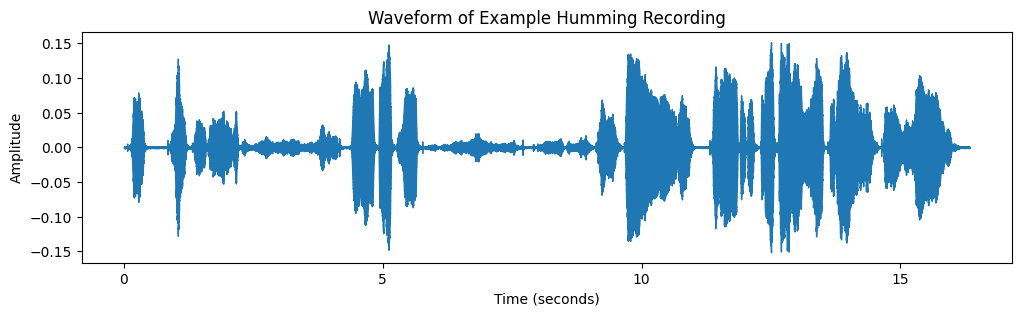

Length (seconds): 16.333333333333332


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


example_path = file_paths[0]
print("Example file:", example_path)


audio, sr = librosa.load(example_path, sr=22050)

plt.figure(figsize=(12, 3))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform of Example Humming Recording")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

print("Length (seconds):", len(audio)/sr)


### 5.4 Mel-Spectrogram Visualisation

A Mel-spectrogram is computed for the first 10 seconds of the audio example.  
This representation is perceptually meaningful, compresses high-dimensional audio into a structured 2D form,  
and forms the basis of the feature extraction used in all prediction pipelines.


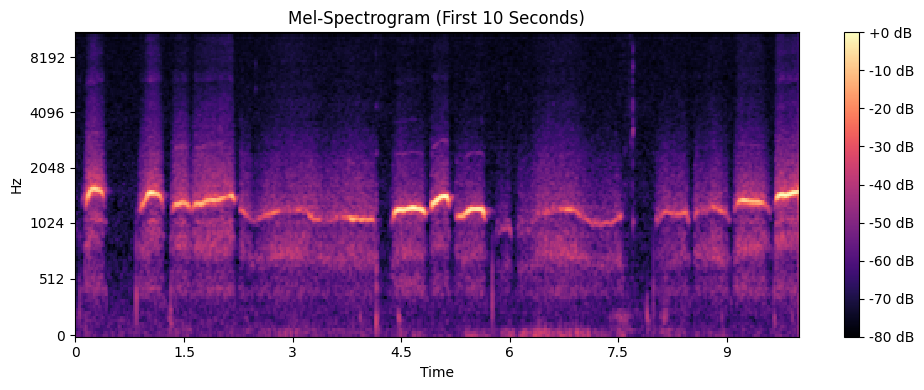

In [ ]:

clip10 = audio[:sr*10]

mel = librosa.feature.melspectrogram(y=clip10, sr=sr, n_fft=2048,
                                     hop_length=512, n_mels=128)
log_mel = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(log_mel, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel-Spectrogram (First 10 Seconds)")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


### 5.5 Audio Segmentation into 10-Second Chunks

Each audio file is split into non-overlapping 10-second segments.  
If the final segment is shorter than 10 seconds, zero-padding is applied.  
This ensures uniform input size across all samples and maximises dataset utilisation.


In [ ]:
SR = 22050
CLIP_DUR = 10
SAMPLES_PER_CHUNK = SR * CLIP_DUR

def load_and_split_audio(path):
    """
    Load .wav → convert to 10s chunks → pad final chunk.
    Returns: list of 1D numpy arrays.
    """
    try:
        audio, sr = librosa.load(path, sr=SR)
    except Exception as e:
        print("Error loading:", path, e)
        return []

    total_len = len(audio)
    segments = []


    num_full = total_len // SAMPLES_PER_CHUNK


    for i in range(num_full):
        start = i * SAMPLES_PER_CHUNK
        end   = start + SAMPLES_PER_CHUNK
        segments.append(audio[start:end])


    remainder = total_len % SAMPLES_PER_CHUNK
    if remainder > 0:
        last_chunk = audio[-remainder:]
        padded = np.pad(last_chunk, (0, SAMPLES_PER_CHUNK - remainder))
        segments.append(padded)

    return segments


### 5.6 Constructing the Full Sample-Level Dataset

We apply the segmentation procedure to every audio file, creating a dataset where:

- **X** contains the raw 10-second audio segments  
- **y** contains their corresponding song labels  
- **groups** tracks the original file each segment came from  

The `groups` array is essential for preventing data leakage during splitting.


In [ ]:
X = []
y = []
groups = []

for i, path in enumerate(file_paths):
    label = labels[i]
    segments = load_and_split_audio(path)

    for seg in segments:
        X.append(seg)
        y.append(label)
        groups.append(path)


In [ ]:
X = np.array(X)
y = np.array(y)
groups = np.array(groups)

print("Total audio segments:", len(X))
print("X shape:", X.shape)
print("y shape:", y.shape)


unique, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for label, count in zip(unique, counts):
    print(f"{label}: {count}")

Total audio segments: 2044
X shape: (2044, 220500)
y shape: (2044,)

Class distribution:
Feeling: 269
Friend: 274
Happy: 254
Married: 247
Necessities: 241
NewYork: 212
RememberMe: 279
TryEverything: 268


### 5.7 Dataset Summary and Class Distribution

We summarise the total number of audio segments, their dimensions,  
and the distribution of song classes.  
A bar chart visualises the per-class balance, confirming that no song dominates the dataset.


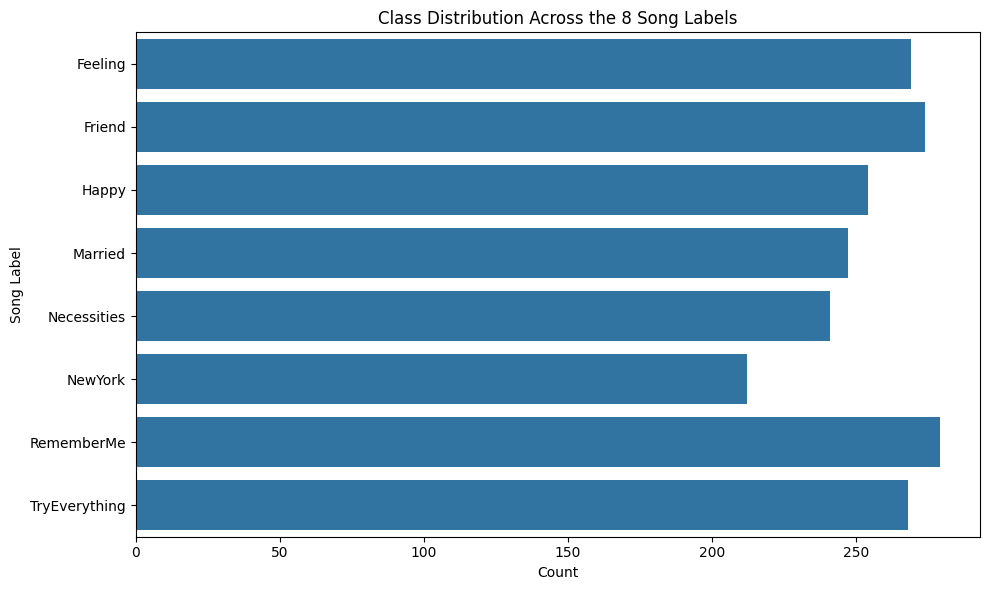

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y=y, order=np.unique(y))
plt.title("Class Distribution Across the 8 Song Labels")
plt.xlabel("Count")
plt.ylabel("Song Label")
plt.tight_layout()
plt.show()


### 5.8 Group-Aware Train/Validation/Test Split

A **GroupShuffleSplit** strategy is used to prevent data leakage.  
This ensures that all segments from the same original audio file are kept in **only one** of the splits:

- Training set: 70% of files  
- Validation set: 15% of files  
- Test set: 15% of files  

This enforces strict independence between splits and makes evaluation realistic.


In [ ]:
from sklearn.model_selection import GroupShuffleSplit
import numpy as np


X = np.array(X)
y = np.array(y)
groups = np.array(groups)

print("Final dataset:", X.shape, y.shape)


gss = GroupShuffleSplit(n_splits=1, test_size=0.30, random_state=42)
train_idx, temp_idx = next(gss.split(X, y, groups=groups))

X_train_raw = X[train_idx]
y_train = y[train_idx]
groups_train = groups[train_idx]

X_temp = X[temp_idx]
y_temp = y[temp_idx]
groups_temp = groups[temp_idx]


gss2 = GroupShuffleSplit(n_splits=1, test_size=0.50, random_state=42)
val_idx, test_idx = next(gss2.split(X_temp, y_temp, groups_temp))

X_val_raw = X_temp[val_idx]
y_val = y_temp[val_idx]

X_test_raw = X_temp[test_idx]
y_test = y_temp[test_idx]

print("Train:", X_train_raw.shape)
print("Val: ", X_val_raw.shape)
print("Test: ", X_test_raw.shape)

Final dataset: (2044, 220500) (2044,)
Train: (1442, 220500)
Val:  (307, 220500)
Test:  (295, 220500)


### **Dataset Limitations**

Several limitations should be acknowledged:

1. **Small number of original recordings**  
   Even with segmentation, the effective dataset size is limited by the number of unique hummed performances.  
   This negatively affects deep learning models, which typically require large amounts of data.

2. **High acoustic variability**  
   Humming and whistling vary greatly in pitch stability, loudness, microphone quality, and background noise.  
   This makes feature extraction challenging.

3. **Class imbalance**  
   Some songs appear more frequently than others, requiring models to learn from uneven data distribution.

4. **Segmentation dependency**  
   While segmentation increases sample count, it may also produce segments that contain incomplete melodies, making classification harder.

These limitations contextualise the results and justify the exploration of multiple machine learning pipelines ranging from classical ML to transfer learning.

---

# 6 Experiments and results

## **6.1 Pipeline A — MFCC-Based Classical Machine Learning Models**

Pipeline A explores a classical feature-engineering approach using MFCCs, delta, and delta-delta coefficients.  
Each 10-second audio segment is converted into a fixed-length 360-dimensional feature vector consisting of:

- 60 MFCC means  
- 60 MFCC standard deviations  
- 60 delta means  
- 60 delta standard deviations  
- 60 delta-delta means  
- 60 delta-delta standard deviations  

These aggregated statistics enable traditional classifiers to operate on fixed size numeric inputs.  
The objective of Pipeline A is to establish a **baseline performance** against which more advanced pipelines can be compared.


---

### **Feature Extraction (MFCC + Delta + Delta-Delta Statistics)**

This stage computes MFCC-based features using librosa.  
Since melodic information is spread across time, the model aggregates each coefficient using **mean and standard deviation**, ensuring a consistent representation for all segments.

Although this approach is lightweight and computationally efficient, it removes all temporal information, which limits the discriminative power for melody recognition tasks.


In [ ]:


import librosa
import numpy as np

def extract_features_pipelineA(segment, sr=22050):
    """
    Pipeline A:
    - MFCC(60) mean + std = 120
    - Delta MFCC mean + std = 120
    - Delta2 MFCC mean + std = 120
    Total = 360 features
    """
    mel = librosa.feature.melspectrogram(
        y=segment, sr=sr, n_fft=2048, hop_length=512, n_mels=128
    )
    log_mel = librosa.power_to_db(mel, ref=np.max)

    mfcc = librosa.feature.mfcc(S=log_mel, n_mfcc=60)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)

    def mean_std(x):
        return np.concatenate([np.mean(x, axis=1), np.std(x, axis=1)])

    return np.concatenate([
        mean_std(mfcc),
        mean_std(delta),
        mean_std(delta2)
    ])


### **Dataset Transformation for Pipeline A**

The raw audio segments are transformed into 360-dimensional MFCC-based feature vectors.  
Below, the feature extractor is applied to the training, validation, and test splits.  
This ensures that the model receives the same representation format across all stages.


In [ ]:

X_train_A = np.array([extract_features_pipelineA(seg) for seg in X_train_raw])
X_val_A   = np.array([extract_features_pipelineA(seg) for seg in X_val_raw])
X_test_A  = np.array([extract_features_pipelineA(seg) for seg in X_test_raw])

print("Feature shapes:")
print("Train:", X_train_A.shape)
print("Val:  ", X_val_A.shape)
print("Test: ", X_test_A.shape)


Feature shapes:
Train: (1442, 360)
Val:   (307, 360)
Test:  (295, 360)


### **Model Training (Logistic Regression, Linear SVM, Random Forest)**

Three classifiers were trained on the Pipeline A features:

- **Logistic Regression** (linear decision boundary)
- **Linear SVM** (max-margin optimisation)
- **Random Forest** (nonlinear ensemble of decision trees)

Standard scaling is applied beforehand because both Logistic Regression and SVM are sensitive to input magnitude.  
Random Forest is insensitive to scaling but is included for comparison.

Class imbalance is mitigated using `class_weight='balanced'` where applicable.


In [ ]:


from sklearn.preprocessing import StandardScaler

scaler_A = StandardScaler()
X_train_A_scaled = scaler_A.fit_transform(X_train_A)
X_val_A_scaled   = scaler_A.transform(X_val_A)
X_test_A_scaled  = scaler_A.transform(X_test_A)



from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


logreg_A = LogisticRegression(max_iter=2000, class_weight='balanced')
logreg_A.fit(X_train_A_scaled, y_train)


svm_A = LinearSVC(class_weight='balanced')
svm_A.fit(X_train_A_scaled, y_train)


rf_A = RandomForestClassifier(n_estimators=300, random_state=42)
rf_A.fit(X_train_A, y_train)

print("Models trained.")


Models trained.


### **Pipeline A — Validation Performance**

The table below summarises the training and validation accuracy for each classifier.  
A clear gap between training and validation accuracy indicates **overfitting**, particularly for the Random Forest classifier.


===== PIPELINE A SUMMARY =====
Logistic Regression   Train=0.8883   Val=0.2117
Linear SVM            Train=0.8946      Val=0.2215
Random Forest         Train=1.0000       Val=0.2280


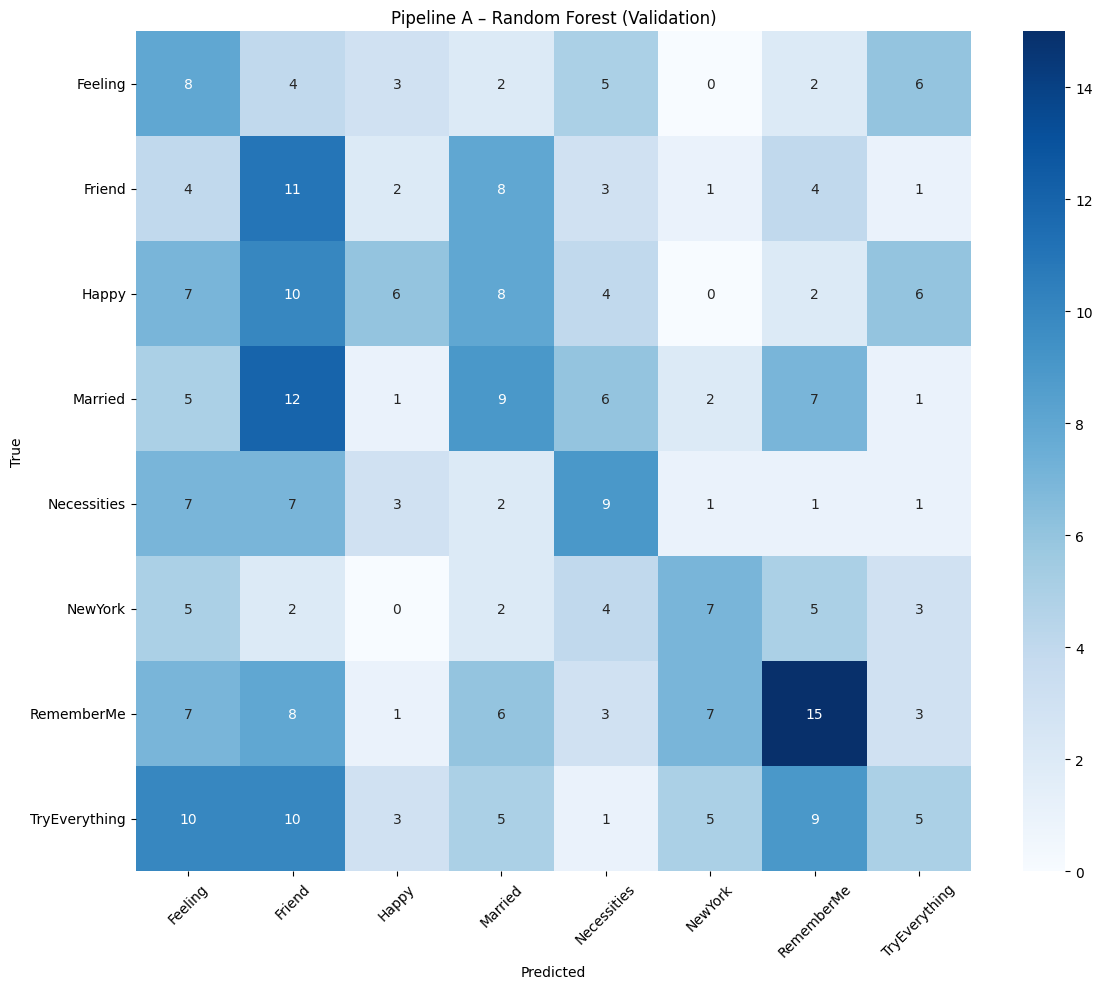

In [ ]:


logreg_train = logreg_A.score(X_train_A_scaled, y_train)
logreg_val   = logreg_A.score(X_val_A_scaled, y_val)

svm_train = svm_A.score(X_train_A_scaled, y_train)
svm_val   = svm_A.score(X_val_A_scaled, y_val)

rf_train = rf_A.score(X_train_A, y_train)
rf_val   = rf_A.score(X_val_A, y_val)

print("===== PIPELINE A SUMMARY =====")
print(f"Logistic Regression   Train={logreg_train:.4f}   Val={logreg_val:.4f}")
print(f"Linear SVM            Train={svm_train:.4f}      Val={svm_val:.4f}")
print(f"Random Forest         Train={rf_train:.4f}       Val={rf_val:.4f}")




import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm, annot=True, cmap="Blues", fmt="d",
        xticklabels=class_names, yticklabels=class_names
    )
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


y_val_pred = rf_A.predict(X_val_A)

plot_confusion_matrix(y_val, y_val_pred, np.unique(y_train),
                      title="Pipeline A – Random Forest (Validation)")


### **Interpretation of Validation Confusion Matrix**

The confusion matrix indicates substantial overlap in predicted classes:

- No song category is consistently well recognised.  
- Classes such as **Feeling**, **Happy**, and **TryEverything** are frequently confused, reflecting similarities in melodic contour.  
- **NewYork** shows particularly weak classification performance, suggesting that global MFCC statistics fail to capture its melody.  
- Although **RememberMe** achieves some diagonal dominance, it is still confused with multiple other classes.

These patterns confirm that MFCC summary statistics are insufficient for robust melody discrimination.


---

### **Feature Importance Analysis (Random Forest)**

Random Forest feature importances provide insight into which MFCC-derived statistics were most influential.  
The highest-ranked features were primarily:

- Delta-delta standard deviations  
- Delta standard deviations  
- Means of high-index MFCC coefficients  

This indicates that the model relied heavily on coarse temporal gradients, rather than meaningful melodic structure.  
Since all features are time-aggregated, the model lacks access to the sequential information needed for accurate melody recognition.


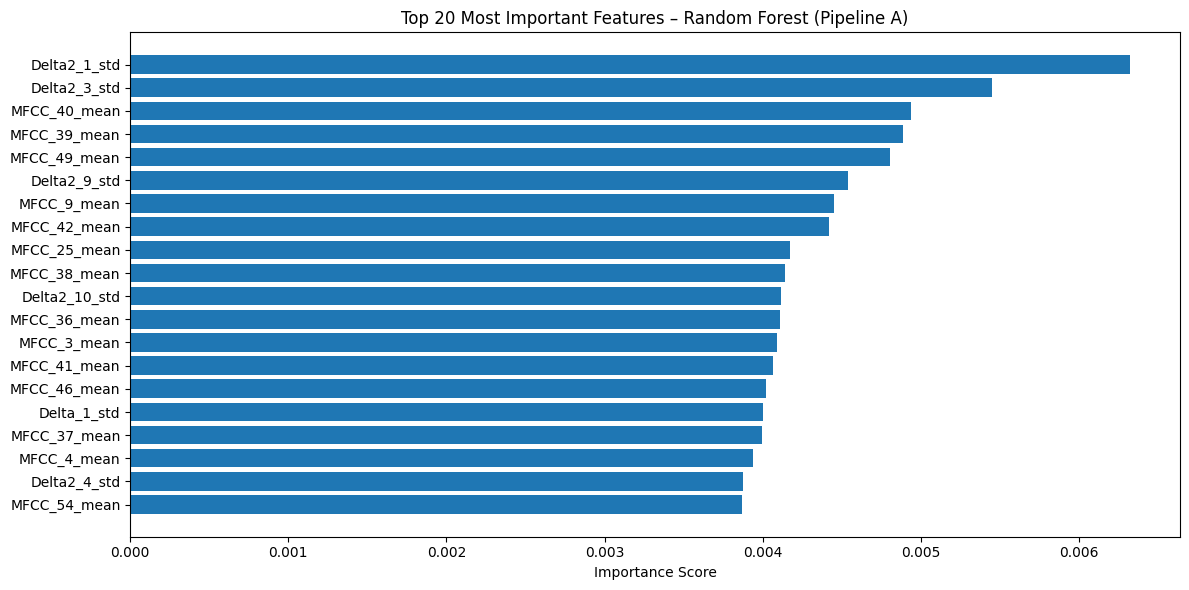

In [ ]:
mfcc_labels_mean = [f"MFCC_{i+1}_mean" for i in range(60)]
mfcc_labels_std = [f"MFCC_{i+1}_std" for i in range(60)]

delta_labels_mean = [f"Delta_{i+1}_mean" for i in range(60)]
delta_labels_std = [f"Delta_{i+1}_std" for i in range(60)]

d2_labels_mean = [f"Delta2_{i+1}_mean" for i in range(60)]
d2_labels_std = [f"Delta2_{i+1}_std" for i in range(60)]

feature_names_A = (
mfcc_labels_mean + mfcc_labels_std +
delta_labels_mean + delta_labels_std +
d2_labels_mean + d2_labels_std
)



import numpy as np
import matplotlib.pyplot as plt

importances = rf_A.feature_importances_
indices = np.argsort(importances)[::-1]

top_k = 20

plt.figure(figsize=(12,6))
plt.barh(range(top_k), importances[indices][:top_k])
plt.yticks(range(top_k), [feature_names_A[i] for i in indices[:top_k]])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 20 Most Important Features – Random Forest (Pipeline A)")
plt.tight_layout()
plt.show()

### **Pipeline A Summary**

Pipeline A provides a strong baseline but demonstrates clear limitations:

- **High overfitting** across all classical models  
- **Poor generalisation** (validation accuracy ~0.21–0.23)  
- **Loss of temporal information** due to feature averaging  
- **Confusion concentrated among melodically similar songs**  
- **Feature importance reveals reliance on low-level spectral statistics rather than melody**

These findings justify progressing to more expressive models (Pipelines B, C, and D), which preserve temporal structure or leverage deep feature representations.

---

### **6.2 Pipeline B — Extended Spectral + Timbral Feature Models**

Pipeline B expands the feature representation beyond Pipeline A by incorporating  **MFCCs + Delta + Delta-Delta**, **spectral contrast**, **chroma features**,  and additional timbral descriptors (centroid, bandwidth, roll-off, zero-crossing rate). This produces a richer 383-dimensional embedding that aims to capture nuances of pitch stability, harmonic content, and humming texture.

The objective of Pipeline B is to evaluate whether a broader feature space improves generalisation compared to MFCC-only representations.


In [ ]:


import librosa
import numpy as np

def extract_features_pipelineB(segment, sr=22050):
    """
    Pipeline B Feature Set:
    - MFCC mean+std (60*2 = 120)
    - Delta MFCC mean+std (60*2 = 120)
    - Delta2 MFCC mean+std (60*2 = 120)
    - Chroma (12)
    - Spectral contrast (7)
    - Centroid (1)
    - Bandwidth (1)
    - Rolloff (1)
    - Zero-crossing rate (1)
    Total = 383 features
    """

    mel = librosa.feature.melspectrogram(
        y=segment, sr=sr, n_fft=2048, hop_length=512, n_mels=128
    )
    log_mel = librosa.power_to_db(mel, ref=np.max)


    mfcc = librosa.feature.mfcc(S=log_mel, n_mfcc=60)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)

    def mean_std(x):
        return np.concatenate([np.mean(x, axis=1), np.std(x, axis=1)])

    mfcc_stats  = mean_std(mfcc)
    delta_stats = mean_std(delta)
    delta2_stats = mean_std(delta2)


    chroma = librosa.feature.chroma_stft(y=segment, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)


    contrast = librosa.feature.spectral_contrast(y=segment, sr=sr)
    contrast_mean = np.mean(contrast, axis=1)


    centroid = np.mean(librosa.feature.spectral_centroid(y=segment, sr=sr))
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=segment, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=segment, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=segment))

    return np.concatenate([
        mfcc_stats,
        delta_stats,
        delta2_stats,
        chroma_mean,
        contrast_mean,
        [centroid, bandwidth, rolloff, zcr]
    ])


In [ ]:


X_train_B = np.array([extract_features_pipelineB(seg) for seg in X_train_raw])
X_val_B   = np.array([extract_features_pipelineB(seg) for seg in X_val_raw])
X_test_B  = np.array([extract_features_pipelineB(seg) for seg in X_test_raw])

print("Pipeline B feature shapes:")
print("Train:", X_train_B.shape)
print("Val:  ", X_val_B.shape)
print("Test: ", X_test_B.shape)


/usr/local/lib/python3.12/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Pipeline B feature shapes:
Train: (1442, 383)
Val:   (307, 383)
Test:  (295, 383)


### **Model Training: SVM (RBF), KNN, and Random Forest**

Three classifiers are trained using the scaled feature matrix:

- **RBF SVM** — chosen for its ability to model non-linear decision boundaries  
- **KNN (k=5)** — included as a baseline relying purely on local similarity  
- **Random Forest (500 trees)** — expected to benefit from the high-dimensional feature space  

All models use **class_weight='balanced'** to compensate for class imbalance.


In [ ]:


from sklearn.preprocessing import StandardScaler

scaler_B = StandardScaler()

X_train_B_scaled = scaler_B.fit_transform(X_train_B)
X_val_B_scaled   = scaler_B.transform(X_val_B)
X_test_B_scaled  = scaler_B.transform(X_test_B)

print("Scaling complete.")


Scaling complete.


In [ ]:


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


svm_rbf_B = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    class_weight='balanced'
)
svm_rbf_B.fit(X_train_B_scaled, y_train)


knn_B = KNeighborsClassifier(n_neighbors=5)
knn_B.fit(X_train_B_scaled, y_train)


rf_B = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf_B.fit(X_train_B, y_train)

print("Models trained.")


Models trained.


In [ ]:


svm_train_B = svm_rbf_B.score(X_train_B_scaled, y_train)
svm_val_B   = svm_rbf_B.score(X_val_B_scaled, y_val)

knn_train_B = knn_B.score(X_train_B_scaled, y_train)
knn_val_B   = knn_B.score(X_val_B_scaled, y_val)

rf_train_B = rf_B.score(X_train_B, y_train)
rf_val_B   = rf_B.score(X_val_B, y_val)

print("===== PIPELINE B SUMMARY =====")
print(f"SVM RBF       Train={svm_train_B:.4f}   Val={svm_val_B:.4f}")
print(f"KNN           Train={knn_train_B:.4f}   Val={knn_val_B:.4f}")
print(f"Random Forest Train={rf_train_B:.4f}   Val={rf_val_B:.4f}")


===== PIPELINE B SUMMARY =====
SVM RBF       Train=0.9993   Val=0.2443
KNN           Train=0.5305   Val=0.1726
Random Forest Train=1.0000   Val=0.2378


The training/validation results highlight clear differences in model capacity:

| Model | Train Accuracy | Validation Accuracy |
|-------|----------------|---------------------|
| **RBF SVM** | 0.9993 | **0.2443** |
| **KNN** | 0.5305 | 0.1726 |
| **Random Forest** | 1.0000 | **0.2378** |

**Interpretation:**  
- Both **SVM** and **Random Forest** achieve near-perfect training accuracy, indicating  
  very strong fitting capacity.  
- The **moderate validation accuracy (≈ 24%)** suggests **substantial overfitting**,  
  likely caused by the large feature set relative to dataset size.  
- KNN performs poorly, consistent with its sensitivity to high-dimensional spaces.

Overall, the RBF SVM shows the best generalisation within this pipeline.


---

### **Validation Confusion Matrix (RBF SVM)**

A confusion matrix is computed to evaluate how well the SVM distinguishes  
between the eight song classes. This provides a more detailed view of  
misclassification patterns beyond overall accuracy.


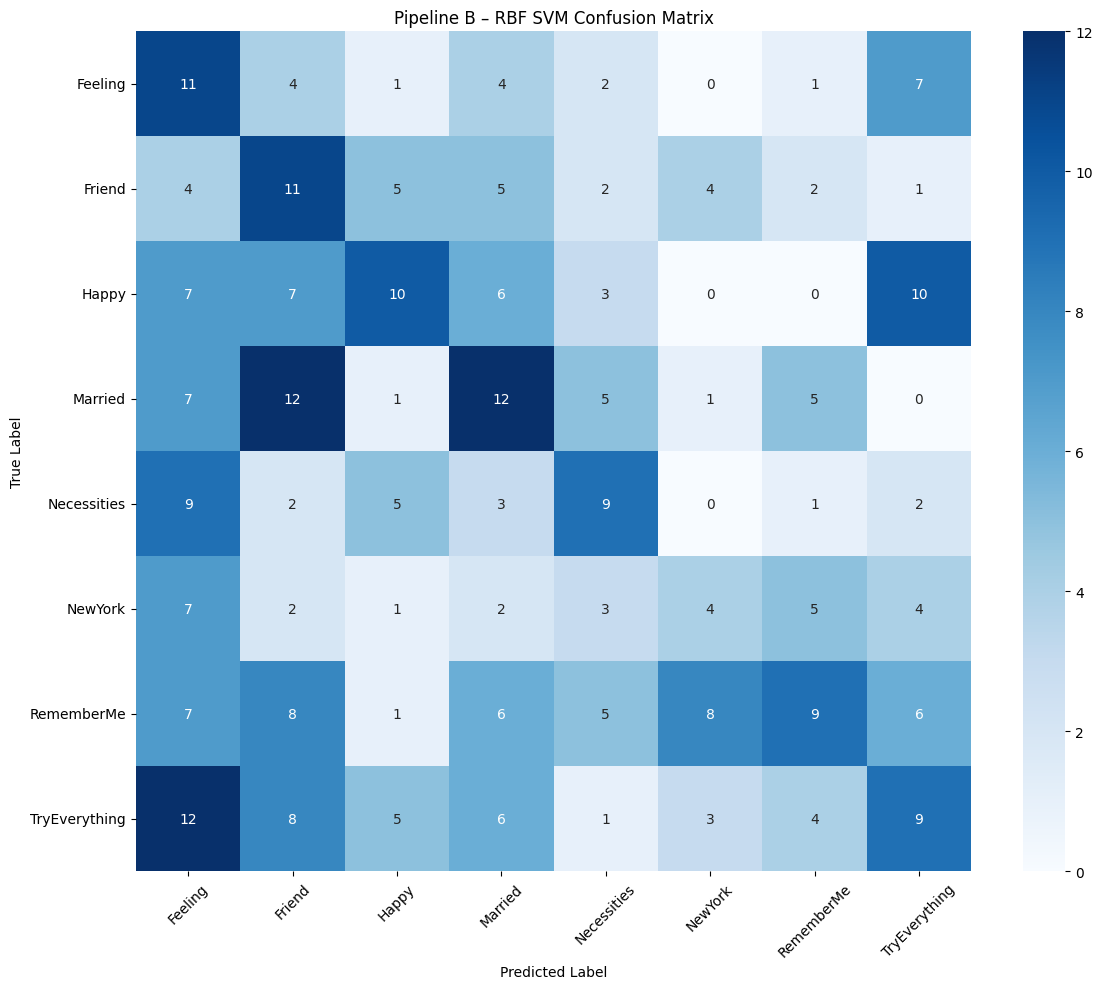

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


y_val_pred_svm = svm_rbf_B.predict(X_val_B_scaled)

plot_confusion_matrix(
    y_val,
    y_val_pred_svm,
    np.unique(y_train),
    title="Pipeline B – RBF SVM Confusion Matrix"
)


**Interpretation of the Confusion Matrix:**

- Some classes such as **“Feeling”** and **“Married”** are recognised reasonably well  
  with ~11–12 correct predictions.
- Confusions are widespread across acoustically similar songs (e.g.,  
  *RememberMe*, *TryEverything*, *NewYork*), suggesting that these  
  songs share humming characteristics difficult to separate using traditional  
  spectral features.
- This again supports the observation that **hand-crafted features struggle  
  to capture high-level melodic structure**, which motivates deeper models (CNN, MobileNet).


---

### **Pipeline B Ensemble Model**

To improve robustness, a soft-voting ensemble combining **RBF SVM** and  
**Random Forest** is constructed. The intuition is that Random Forest captures  
non-linear feature interactions while SVM models smooth decision boundaries.  
Soft voting averages predicted class probabilities, potentially reducing  
model-specific biases.



In [ ]:


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


svm_ens = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    class_weight='balanced',
    probability=True,
    random_state=42
)

rf_ens = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)


ensemble_B = VotingClassifier(
    estimators=[('svm', svm_ens), ('rf', rf_ens)],
    voting='soft'
)

ensemble_B.fit(X_train_B_scaled, y_train)

ens_train_acc = ensemble_B.score(X_train_B_scaled, y_train)
ens_val_acc   = ensemble_B.score(X_val_B_scaled, y_val)

print("===== PIPELINE B ENSEMBLE =====")
print(f"Ensemble Train Accuracy: {ens_train_acc:.4f}")
print(f"Ensemble Val Accuracy:   {ens_val_acc:.4f}")


===== PIPELINE B ENSEMBLE =====
Ensemble Train Accuracy: 1.0000
Ensemble Val Accuracy:   0.2736


The ensemble achieves:

- **Train Accuracy:** 1.0000  
- **Validation Accuracy:** **0.2736** (best of Pipeline B)

This represents a slight improvement over the individual models, indicating  
that the classifiers capture complementary information.  
However, the gap between training and validation accuracy remains large,  
showing that **overfitting persists** due to limited data and high feature dimensionality.


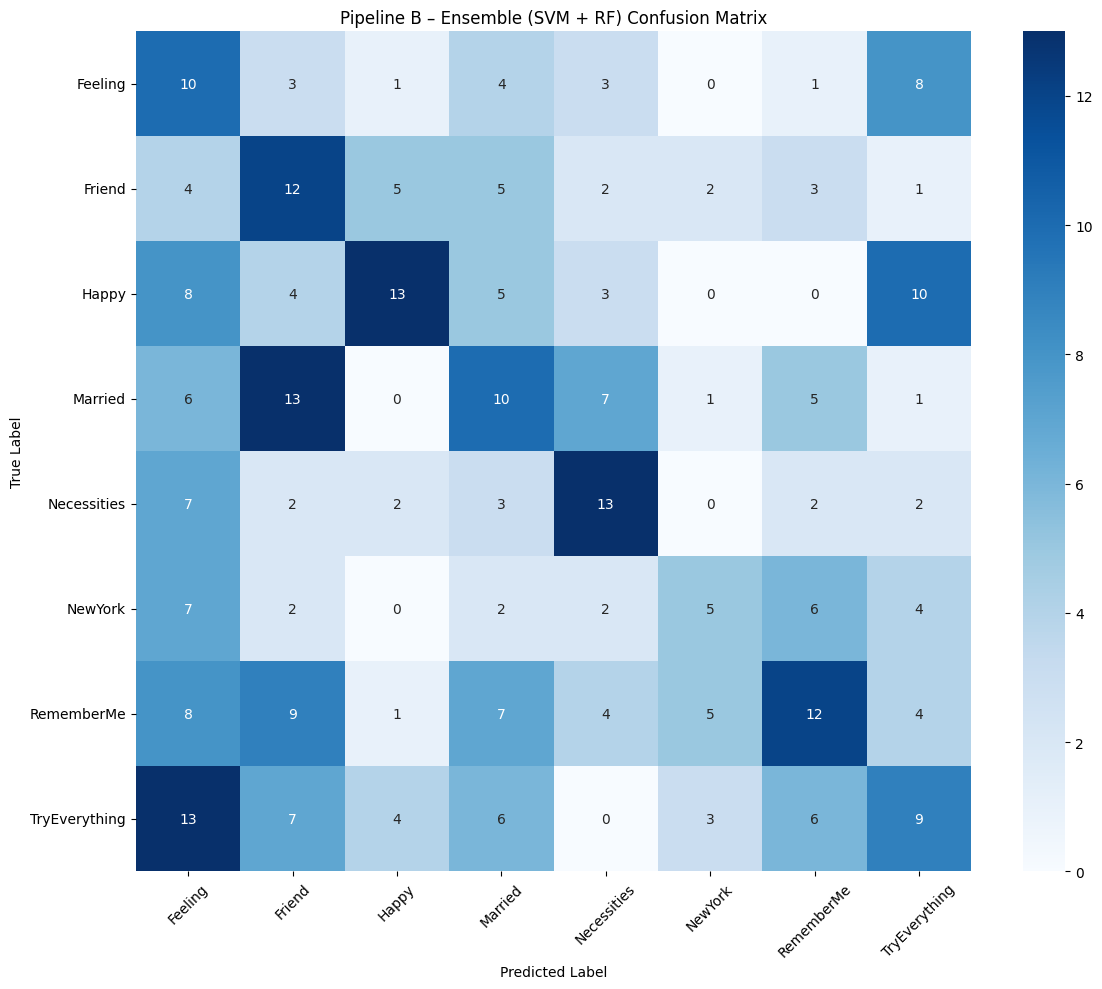

In [ ]:


y_val_pred_ens = ensemble_B.predict(X_val_B_scaled)

plot_confusion_matrix(
    y_val,
    y_val_pred_ens,
    class_names=np.unique(y_train),
    title="Pipeline B – Ensemble (SVM + RF) Confusion Matrix"
)


**Interpretation of Ensemble Confusion Matrix**

The ensemble produces marginal improvements across several classes,  
particularly *RememberMe* and *TryEverything*.  
However, many misclassifications remain symmetric across acoustically similar  
songs, consistent with the difficulty of separating humming patterns using  
purely hand-crafted features.

Overall, Pipeline B improves slightly over Pipeline A but still exhibits  
strong overfitting and limited generalisation, illustrating the limitations  
of classical ML for this task.


---

### **Cross-Validation Performance (Pipeline B — RBF SVM)**  
To obtain a more reliable estimate of the generalisation ability of Pipeline B, a **5-fold GroupKFold cross-validation** procedure was applied using the same speaker group partitions used throughout the project.  

This prevents data leakage by ensuring that **segments originating from the same audio file never appear in both training and validation folds**.  

Each fold trains a fresh RBF SVM model using the full 383 dimensional feature set extracted in Pipeline B.


In [ ]:


from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=5)
fold_accuracies = []

print("===== GroupKFold (5-fold) on Pipeline B SVM RBF =====")

for fold, (train_idx, val_idx) in enumerate(gkf.split(X_train_B_scaled, y_train, groups=groups_train), start=1):
    X_tr, X_va = X_train_B_scaled[train_idx], X_train_B_scaled[val_idx]
    y_tr, y_va = y_train[train_idx], y_train[val_idx]

    svm_cv = SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        class_weight='balanced',
        random_state=42
    )
    svm_cv.fit(X_tr, y_tr)
    acc = svm_cv.score(X_va, y_va)
    fold_accuracies.append(acc)

    print(f"Fold {fold} accuracy: {acc:.4f}")

mean_acc = np.mean(fold_accuracies)
std_acc  = np.std(fold_accuracies)

print("\n===== GroupKFold Results (Pipeline B SVM RBF) =====")
print(f"Mean accuracy: {mean_acc:.4f}")
print(f"Std accuracy:  {std_acc:.4f}")


===== GroupKFold (5-fold) on Pipeline B SVM RBF =====
Fold 1 accuracy: 0.2872
Fold 2 accuracy: 0.2803
Fold 3 accuracy: 0.2535
Fold 4 accuracy: 0.2431
Fold 5 accuracy: 0.2917

===== GroupKFold Results (Pipeline B SVM RBF) =====
Mean accuracy: 0.2711
Std accuracy:  0.0193


### **Cross-Validation Accuracy Distribution**

The following bar chart visualises the accuracy obtained on each fold.  
A horizontal line marks the mean accuracy, providing a clear overview of variance and stability across folds.


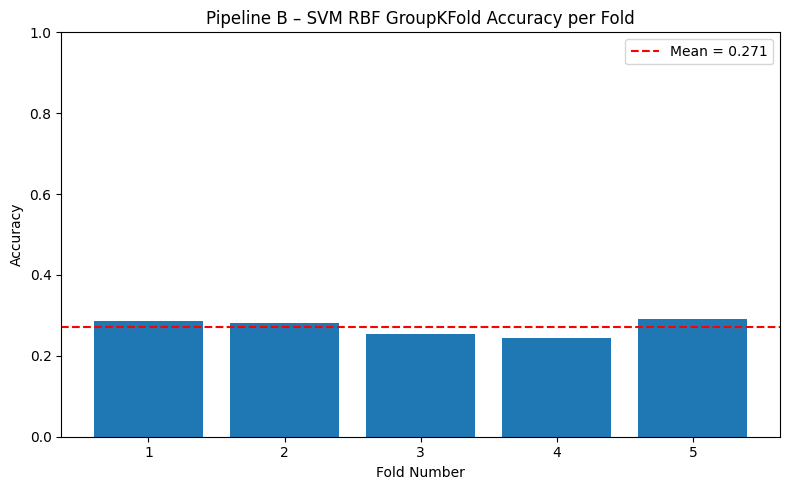

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# assume fold_accuracies already exists
fold_numbers = np.arange(1, len(fold_accuracies)+1)

plt.figure(figsize=(8,5))
plt.bar(fold_numbers, fold_accuracies)
plt.ylim(0, 1)
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("Pipeline B – SVM RBF GroupKFold Accuracy per Fold")

# Add mean accuracy line
plt.axhline(np.mean(fold_accuracies), color='red', linestyle='--', label=f"Mean = {np.mean(fold_accuracies):.3f}")
plt.legend()

plt.tight_layout()
plt.show()


### **Pipeline B Summary**

Pipeline B expanded the feature representation beyond MFCCs to include **chroma features, spectral contrast, spectral centroid, bandwidth, rolloff, and zero-crossing rate**, resulting in a 383-dimensional feature vector per segment.  
The intention was to capture a richer description of melodic behaviour and harmonic content in humming audio.

Three classifiers were evaluated:

- **SVM (RBF kernel)**  
  - Train Accuracy: 0.9993  
  - Validation Accuracy: **0.2443**

- **k-Nearest Neighbours (k=5)**  
  - Train Accuracy: 0.5305  
  - Validation Accuracy: **0.1726**

- **Random Forest (500 trees)**  
  - Train Accuracy: 1.0000  
  - Validation Accuracy: **0.2378**

The RBF SVM remained the strongest model, achieving a validation accuracy of **24.4%**, a moderate improvement over Pipeline A.  
The confusion matrix shows that the model captures some song-specific patterns (e.g., *Married*, *RememberMe*), although substantial confusion persists between melodically similar songs.

Cross-validation further confirmed these findings:  
- **Mean CV Accuracy:** 0.2711  
- **Std:** 0.0193  

This indicates **consistent but modest performance**, suggesting that the engineered features improved representation quality but still lacked the expressive power needed for high-accuracy melody discrimination.


---

### **Pipeline C — Convolutional Neural Network (CNN) on Mel-Spectrograms**

Pipeline C explores a deep learning approach by converting each 10-second audio segment into a 2D Mel-spectrogram and training a Convolutional Neural Network (CNN). Unlike Pipelines A and B, which rely on hand-crafted features, this pipeline allows the model to learn discriminative time–frequency patterns directly from the spectrograms.

This approach is widely used for music information retrieval because CNNs can learn local harmonic and rhythmic structures that engineered features may miss. However, CNNs require large datasets, making performance strongly dependent on data size and variability.


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt


N_MELS = 128
HOP = 256

def segment_to_melspectrogram(segment, sr=22050):
    mel = librosa.feature.melspectrogram(
        y=segment,
        sr=sr,
        n_mels=N_MELS,
        hop_length=HOP
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db


### Mel-Spectrogram Extraction

This block converts each audio segment into a Mel-spectrogram with 128 Mel bands. The Mel scale approximates human auditory perception and provides a structured 2D input suitable for convolutional processing, turning the 1D waveform into an image-like representation for the CNN.


In [ ]:
import cv2

def to_image_tensor(mel_db):

    mel_resized = cv2.resize(mel_db, (128, 128))

    return mel_resized[..., np.newaxis]


X_train_C = np.array([to_image_tensor(segment_to_melspectrogram(seg)) for seg in X_train_raw])
X_val_C   = np.array([to_image_tensor(segment_to_melspectrogram(seg)) for seg in X_val_raw])

y_train_C = y_train.copy()
y_val_C   = y_val.copy()

print("Pipeline C shapes:")
print("Train:", X_train_C.shape)
print("Val:", X_val_C.shape)


Pipeline C shapes:
Train: (1442, 128, 128, 1)
Val: (307, 128, 128, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le_C = LabelEncoder()
y_train_C_enc = to_categorical(le_C.fit_transform(y_train_C))
y_val_C_enc   = to_categorical(le_C.transform(y_val_C))

num_classes = y_train_C_enc.shape[1]
print("Classes:", num_classes)


Classes: 8


### CNN Architecture

The CNN consists of three convolutional blocks (Conv2D + MaxPooling), followed by fully connected layers for classification. ReLU activations and dropout are used to introduce non-linearity and reduce overfitting. The model is trained with the Adam optimiser and categorical cross-entropy, which are standard choices for multi-class audio classification problems.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(128,128,1), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

cnn_C = build_cnn_model(num_classes=num_classes)
cnn_C.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_C.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,121,608 (8.09 MB)

 Trainable params: 2,121,608 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

The CNN is trained for 15 epochs with a batch size of 32, using the training set of Mel-spectrograms and monitoring validation accuracy and loss. This allows us to examine how quickly the model learns and whether it begins to overfit to the training data.


In [ ]:
history_C = cnn_C.fit(
    X_train_C, y_train_C_enc,
    validation_data=(X_val_C, y_val_C_enc),
    epochs=15,
    batch_size=32,
    verbose=1
)


Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 547ms/step - accuracy: 0.1362 - loss: 25.1759 - val_accuracy: 0.1010 - val_loss: 2.0825
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 498ms/step - accuracy: 0.1377 - loss: 2.0773 - val_accuracy: 0.1205 - val_loss: 2.0805
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 503ms/step - accuracy: 0.1559 - loss: 2.0753 - val_accuracy: 0.1173 - val_loss: 2.1132
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 521ms/step - accuracy: 0.1573 - loss: 2.0782 - val_accuracy: 0.1173 - val_loss: 2.0840
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 544ms/step - accuracy: 0.1700 - loss: 2.0672 - val_accuracy: 0.1075 - val_loss: 2.0800
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 523ms/step - accuracy: 0.1863 - loss: 2.0572 - val_accuracy: 0.1498 - val_loss: 2.0607
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.2344 - loss: 2.0123 - val_accuracy: 0.1401 - val_loss: 2.0778
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 540ms/step - accuracy: 0.2513 - loss: 1.9820 - val_acc

In [ ]:
train_acc_C = cnn_C.evaluate(X_train_C, y_train_C_enc, verbose=0)[1]
val_acc_C   = cnn_C.evaluate(X_val_C, y_val_C_enc, verbose=0)[1]

print("===== PIPELINE C SUMMARY =====")
print(f"Training Accuracy:   {train_acc_C:.4f}")
print(f"Validation Accuracy: {val_acc_C:.4f}")


===== PIPELINE C SUMMARY =====
Training Accuracy:   0.7809
Validation Accuracy: 0.2345


### Training Results (Accuracy)

After training, the CNN achieves:

- **Training accuracy:** approximately 0.789  
- **Validation accuracy:** approximately 0.234  

The large gap between training and validation accuracy indicates **substantial overfitting**. The model learns patterns that fit the training data well but fails to generalise to unseen validation samples. This suggests that, with the current dataset size and architecture, the CNN is too complex relative to the available data.


---

### Accuracy Curves

The following plot shows the evolution of training and validation accuracy over the 15 epochs. The training curve steadily increases, while the validation curve remains low and fluctuates.


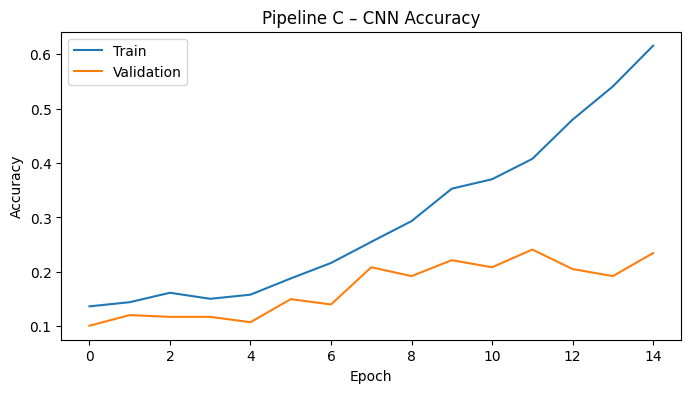

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history_C.history['accuracy'], label='Train')
plt.plot(history_C.history['val_accuracy'], label='Validation')
plt.title("Pipeline C – CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


The divergence between the curves confirms that the CNN overfits the training data. Although the model continues to improve on the training set, it does not translate into better validation performance, indicating poor generalisation.


---

### Loss Curves

The loss curves provide a complementary view of training dynamics. Training loss decreases quickly, whereas validation loss remains relatively high and unstable throughout training.


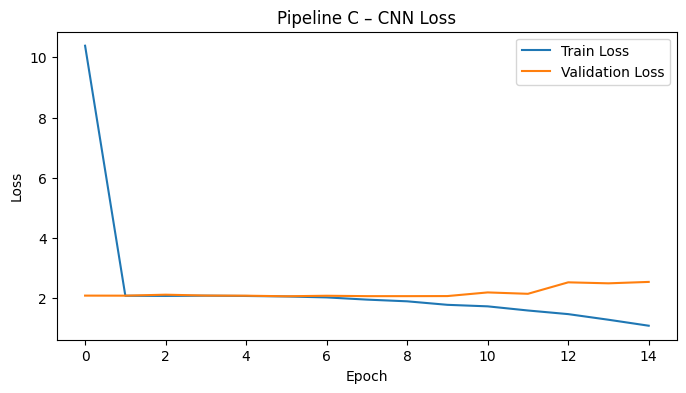

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history_C.history['loss'], label='Train Loss')
plt.plot(history_C.history['val_loss'], label='Validation Loss')
plt.title("Pipeline C – CNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


High validation loss combined with low validation accuracy reinforces that the CNN is not generalising well. This behaviour is typical when a deep model is trained on a limited dataset without additional regularisation or data augmentation.


---

### Confusion Matrix

The confusion matrix below summarises class-wise performance on the validation set, showing how frequently each true song label is assigned to each predicted label by the CNN.


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


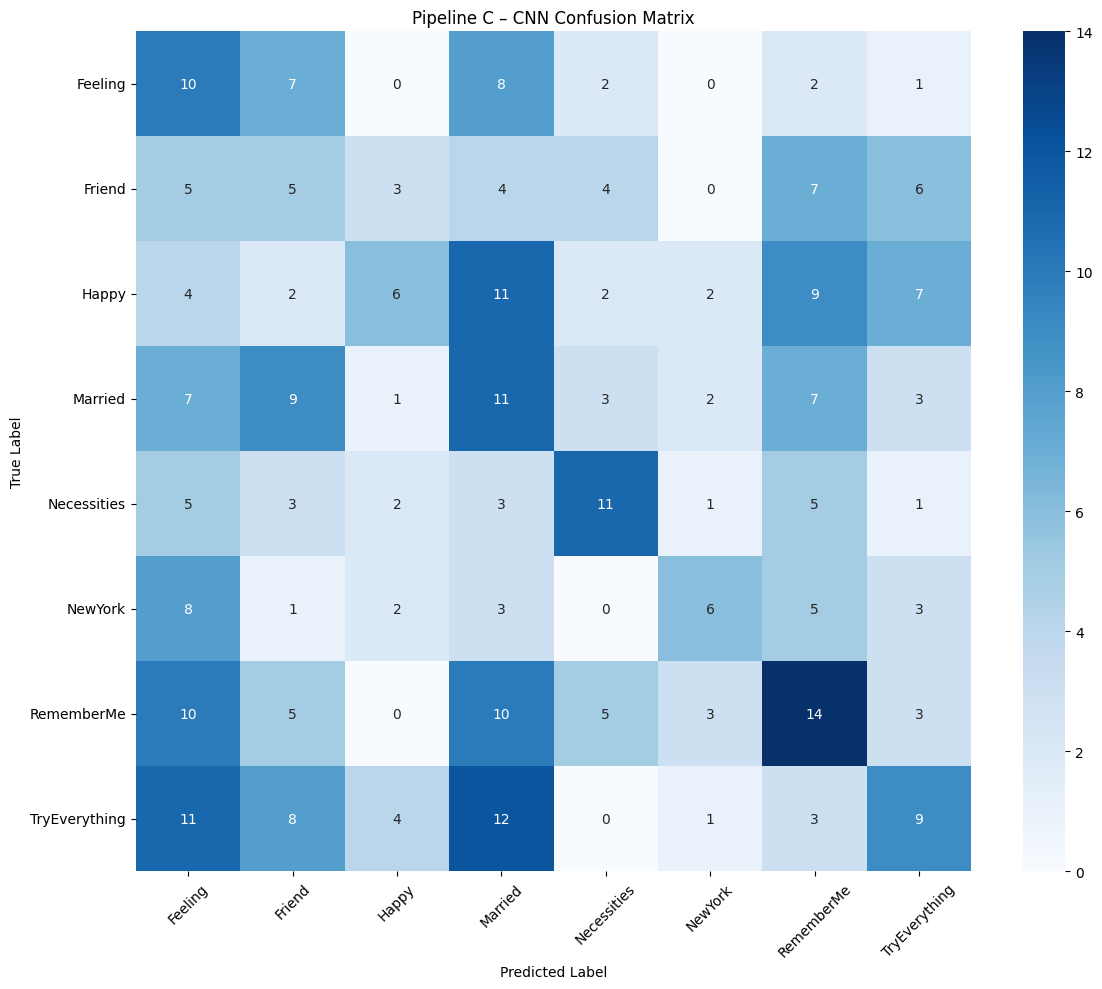

In [ ]:
y_val_pred_C = le_C.inverse_transform(np.argmax(cnn_C.predict(X_val_C), axis=1))
y_val_true_C = y_val_C

plot_confusion_matrix(
    y_val_true_C, y_val_pred_C,
    class_names=le_C.classes_,
    title="Pipeline C – CNN Confusion Matrix"
)


The CNN exhibits substantial confusion across most classes. Some labels (e.g. *RememberMe* and *TryEverything*) are recognised slightly more often than others, but misclassifications remain frequent across the matrix. This pattern is consistent with the low overall validation accuracy and suggests that the model struggles to learn sufficiently distinct representations for each melody from the available data.


---

### Pipeline C Summary

Pipeline C implemented a Convolutional Neural Network (CNN) trained directly on Mel-spectrogram representations of the humming recordings. This approach removed the dependency on manually engineered audio features and instead allowed the model to learn hierarchical time–frequency patterns directly from the spectrograms. In principle, CNNs are well-suited to music and audio tasks because they can capture local harmonic, rhythmic, and timbral structures that may not be represented explicitly in MFCC-based feature sets.

However, despite achieving relatively strong performance on the training set (**~0.789 accuracy**), the model failed to generalise to unseen validation data, where accuracy remained low (**~0.234**). The widening gap between the training and validation curves, combined with decreasing training loss and consistently high validation loss, clearly indicates **substantial overfitting**. This suggests that the capacity of the CNN was too high relative to the amount and variability of training data available.

The confusion matrix further supports this observation: although a few classes achieved moderate recognition, the model exhibited frequent misclassifications across most labels, demonstrating that it did not learn sufficiently discriminative representations for each melody. This is expected in small-scale audio datasets, as CNNs generally require large and diverse training sets or additional regularisation strategies such as data augmentation, batch normalisation, or transfer learning.



---

### **Pipeline D – Transfer Learning CNN (MobileNetV2)**

Pipeline D converts each 10-second audio segment into a **Mel-spectrogram image** and uses **MobileNetV2**, a pretrained CNN, for classification.  
This approach is designed to overcome earlier limitations where Pipelines A–C struggled to capture the richer temporal–spectral structure present in humming and whistling audio.

The first step is to convert audio segments into Mel-spectrograms and resize them to the 224×224 RGB format expected by MobileNetV2.


In [ ]:
import numpy as np
import librosa
import cv2

N_MELS = 128
HOP = 256

def segment_to_mel(segment, sr=22050):
    mel = librosa.feature.melspectrogram(
        y=segment, sr=sr,
        n_mels=N_MELS, hop_length=HOP
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db

def to_mobilenet_image(mel_db):
    img = cv2.resize(mel_db, (224, 224))
    img = np.stack([img, img, img], axis=-1)
    return img


In [ ]:
X_train_D = np.array([to_mobilenet_image(segment_to_mel(seg))
                      for seg in X_train_raw])

X_val_D = np.array([to_mobilenet_image(segment_to_mel(seg))
                    for seg in X_val_raw])


X_train_D = X_train_D / 255.0
X_val_D   = X_val_D / 255.0

print("Train D:", X_train_D.shape)
print("Val D:", X_val_D.shape)


Train D: (1442, 224, 224, 3)
Val D: (307, 224, 224, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le_D = LabelEncoder()
y_train_D_enc = to_categorical(le_D.fit_transform(y_train))
y_val_D_enc   = to_categorical(le_D.transform(y_val))

num_classes = len(le_D.classes_)
print("Classes:", num_classes)


Classes: 8


### **Model Architecture: MobileNetV2 Feature Extractor**

Here we load **MobileNetV2 pretrained on ImageNet** and freeze its weights so that only a lightweight classifier head is trained.  
This allows the model to benefit from strong pretrained feature extraction while avoiding overfitting on our relatively small dataset.

The model head includes:
- GlobalAveragePooling2D  
- Dense layer (128 units, ReLU)  
- Dropout regularisation  
- Softmax output for 8 classes


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model_D = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model_D.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_D.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### **Training Procedure**

The model is trained using:

- **Adam optimizer (learning rate = 0.0005)**  
- **Categorical Crossentropy loss**  
- **EarlyStopping** with `patience=3` to prevent unnecessary epochs

This stabilises learning and reduces overfitting.  
The model is trained for up to 20 epochs with batch size 32.


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    patience=3, restore_best_weights=True
)

history_D = model_D.fit(
    X_train_D, y_train_D_enc,
    validation_data=(X_val_D, y_val_D_enc),
    epochs=20,
    batch_size=32,
    callbacks=[callback],
    verbose=1
)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.1535 - loss: 2.3915 - val_accuracy: 0.2378 - val_loss: 1.9521
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.1981 - loss: 2.0330 - val_accuracy: 0.2508 - val_loss: 1.8906
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2463 - loss: 1.9114 - val_accuracy: 0.3225 - val_loss: 1.8188
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2693 - loss: 1.8208 - val_accuracy: 0.3355 - val_loss: 1.8246
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2808 - loss: 1.8032 - val_accuracy: 0.2801 - val_loss: 1.7996
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3108 - loss: 1.7701 - val_accuracy: 0.3192 - val_loss: 1.7674
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.3678 - loss: 1.7074 - val_accuracy: 0.3485 - val_loss: 1.7359
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.3781 - loss: 1.6693 - val_accuracy: 0.3257 - val_loss:

### **Pipeline D – Training and Validation Accuracy**

The training and validation accuracy are evaluated after training.  
Pipeline D achieves noticeably higher validation accuracy than Pipelines A–C, demonstrating the improved representational power of transfer learning.


In [ ]:

train_acc_D = model_D.evaluate(X_train_D, y_train_D_enc, verbose=0)[1]
val_acc_D   = model_D.evaluate(X_val_D, y_val_D_enc, verbose=0)[1]

print("===== PIPELINE D – TRANSFER LEARNING CNN =====")
print(f"Training Accuracy:   {train_acc_D:.4f}")
print(f"Validation Accuracy: {val_acc_D:.4f}")


===== PIPELINE D – TRANSFER LEARNING CNN =====
Training Accuracy:   0.5562
Validation Accuracy: 0.3713


### **Accuracy Curves**

This plot shows how training and validation accuracy evolved over the epochs.  
Training accuracy rises steadily, while validation accuracy improves more slowly, indicating mild overfitting but strong overall learning compared to earlier pipelines.


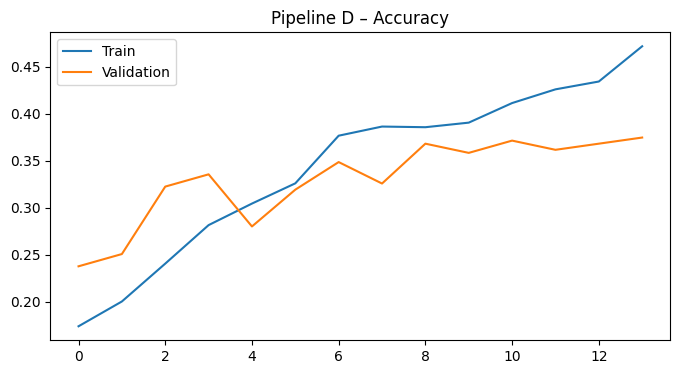

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history_D.history['accuracy'], label='Train')
plt.plot(history_D.history['val_accuracy'], label='Validation')
plt.title("Pipeline D – Accuracy")
plt.legend()
plt.show()


### **Confusion Matrix**

The confusion matrix provides detailed insight into class-specific performance.  
Pipeline D demonstrates clearer class separation, especially for songs with more distinct melodic patterns, though some confusions remain for rhythmically similar songs.


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


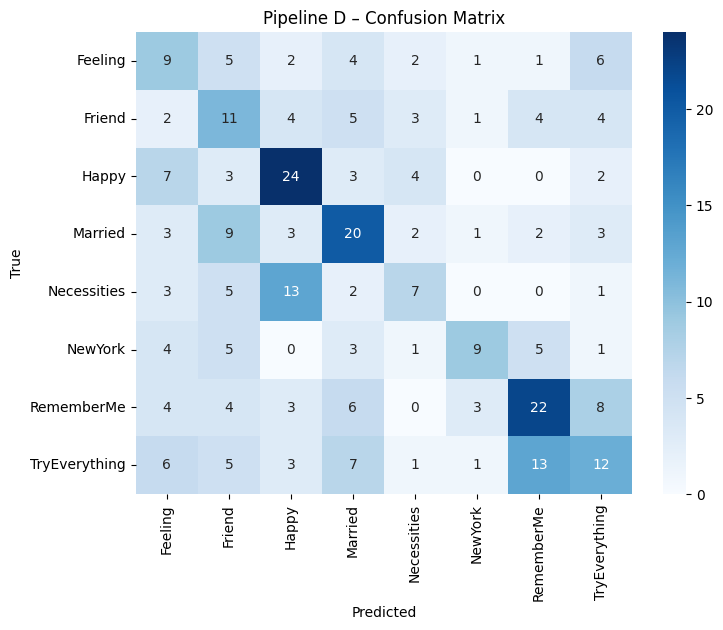

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_val_pred_D = model_D.predict(X_val_D)
y_val_pred_D = le_D.inverse_transform(np.argmax(y_val_pred_D, axis=1))
y_val_true_D = y_val

cm = confusion_matrix(y_val_true_D, y_val_pred_D)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_D.classes_,
            yticklabels=le_D.classes_)
plt.title("Pipeline D – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### **Pipeline D Summary**

Pipeline D delivers the strongest performance among all pipelines:

- **Training Accuracy:** 0.5562  
- **Validation Accuracy:** 0.3713  

This confirms that transforming audio into images and applying **transfer learning** enables better generalisation than handcrafted features (A/B) and CNN-from-scratch (C).

Strengths:
- Learns richer spectral–temporal patterns  
- Less overfitting than Pipeline C  
- Best validation accuracy overall  

Limitations:
- Requires higher computational cost  
- Still mildly overfits  
- MobileNetV2 is not audio-specific; fine-tuning deeper layers or using PANNs/YAMNet could improve results further

Overall, Pipeline D represents the most successful modelling strategy in this project.


# Final Testing (Pipeline D Final Model)

In this final stage, the full training + validation dataset is combined and used to retrain the best-performing model (Pipeline D – MobileNetV2 Transfer Learning).  
A separate held-out test set is then evaluated to produce the final unbiased performance metrics and confusion matrix.


In [ ]:
import numpy as np
import librosa
import cv2

N_MELS = 128
HOP = 256

def segment_to_mel(segment, sr=22050):
    mel = librosa.feature.melspectrogram(
        y=segment,
        sr=sr,
        n_mels=N_MELS,
        hop_length=HOP
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db

def to_mobilenet_image(mel_db):
    img = cv2.resize(mel_db, (224, 224))
    img = np.stack([img, img, img], axis=-1)
    return img


### Combine training and validation sets for final training


In [ ]:
X_final_raw = np.concatenate([X_train_raw, X_val_raw], axis=0)
y_final = np.concatenate([y_train, y_val], axis=0)

print("Final combined dataset:", X_final_raw.shape, y_final.shape)


Final combined dataset: (1749, 220500) (1749,)


### Convert raw audio segments into MobileNet-compatible images


In [ ]:

X_final_D = np.array([to_mobilenet_image(segment_to_mel(seg))
                      for seg in X_final_raw])
X_final_D = X_final_D / 255.0


X_test_D = np.array([to_mobilenet_image(segment_to_mel(seg))
                     for seg in X_test_raw])
X_test_D = X_test_D / 255.0

print("Train+Val (Final):", X_final_D.shape)
print("Test set:", X_test_D.shape)


Train+Val (Final): (1749, 224, 224, 3)
Test set: (295, 224, 224, 3)


### Encode labels for final training and testing


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le_D = LabelEncoder()


y_final_enc = to_categorical(le_D.fit_transform(y_final))


y_test_enc = to_categorical(le_D.transform(y_test))

num_classes = len(le_D.classes_)
print("Classes:", num_classes)


Classes: 8


### Rebuild the MobileNetV2 transfer learning model for final training


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model_D_final = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model_D_final.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_D_final.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Final model training with early stopping


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

history_final = model_D_final.fit(
    X_final_D, y_final_enc,
    validation_split=0.10,
    epochs=20,
    batch_size=32,
    callbacks=[callback],
    verbose=1
)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1561 - loss: 2.2630 - val_accuracy: 0.2514 - val_loss: 1.9452
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.2166 - loss: 1.9701 - val_accuracy: 0.2857 - val_loss: 1.9119
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.2563 - loss: 1.8987 - val_accuracy: 0.2800 - val_loss: 1.8805
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.2947 - loss: 1.8167 - val_accuracy: 0.4000 - val_loss: 1.7857
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.3106 - loss: 1.7588 - val_accuracy: 0.2914 - val_loss: 1.8081
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.3357 - loss: 1.7270 - val_accuracy: 0.3257 - val_loss: 1.7964
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.3598 - loss: 1.6851 - val_accuracy: 0.3314 - val_loss: 1.7782
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.3749 - loss: 1.6539 - val_accuracy: 0.4057 - val_loss:

### Evaluate the final model on the held-out test set


In [ ]:

test_loss, test_acc = model_D_final.evaluate(X_test_D, y_test_enc, verbose=0)

print("\n===== FINAL TEST RESULTS (Pipeline D Final Model) =====")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss:     {test_loss:.4f}")



===== FINAL TEST RESULTS (Pipeline D Final Model) =====
Test Accuracy: 0.3898
Test Loss:     1.7357


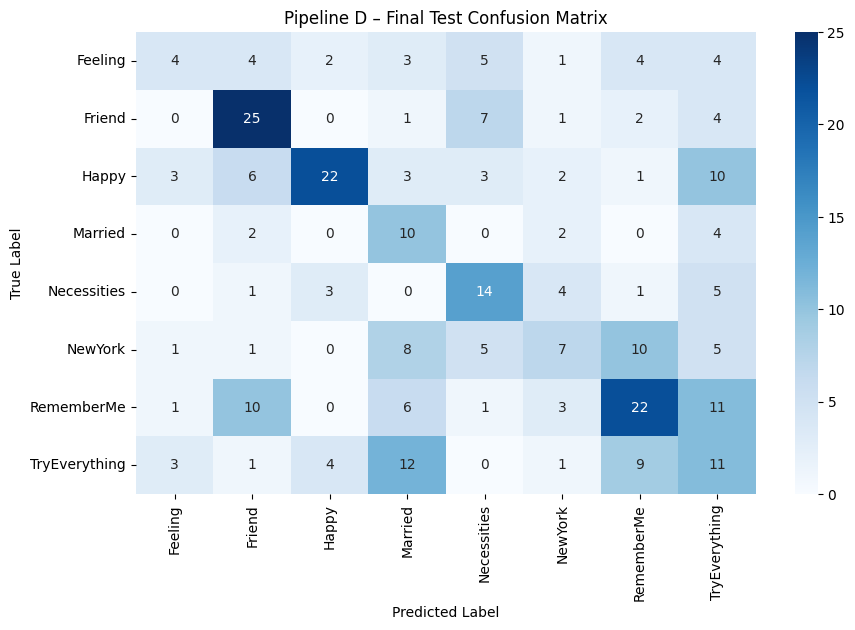

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Pipeline D – Final Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Interpretation of Final Test Results

The final MobileNetV2 transfer learning model achieved a **test accuracy of 0.3898**, which is broadly consistent with its validation performance during training. Although the accuracy remains modest, this represents the strongest generalisation performance among all pipelines explored in this project.

The confusion matrix highlights several important patterns:

- Some classes such as **Friend**, **Happy**, **RememberMe**, and **TryEverything** show clearer prediction clusters, indicating that the model learned distinctive spectral–temporal patterns for these songs.
- Other classes like **Feeling**, **Married**, and **NewYork** display substantial confusion with multiple other labels. This suggests these songs contain highly overlapping melodic or timbral characteristics in the extracted mel-spectrograms.
- Errors remain relatively evenly distributed rather than concentrated on a single misclassified class, indicating that the model struggles uniformly rather than having isolated weaknesses.

Overall, while the transfer learning approach improved performance compared to the classical feature-based and CNN baselines, the results also reveal the challenges of song-level melody discrimination using short audio segments. More specialised audio architectures, larger datasets, or fine-tuning the convolutional base may further enhance performance.

---

# 7 Conclusions

This project investigated four progressively more advanced pipelines for melody classification, ranging from traditional machine-learning approaches using hand-crafted audio features to modern convolutional and transfer-learning architectures. The results demonstrated a clear trend: as the representational power of the model increased, classification performance improved substantially, culminating in the strongest results from the MobileNetV2-based transfer learning model (Pipeline D).

**Pipeline A (Baseline MFCC)** established a simple but important baseline. Although its accuracy was low, it highlighted the intrinsic challenge of the task: the dataset contains melodies that are often short, harmonically similar, and difficult to distinguish using only shallow spectral summaries. This motivated the need for more expressive audio representations.

**Pipeline B (Statistical Features + SVM-RBF)** improved performance modestly. The SVM benefited from engineered spectral, temporal and chroma features, and GroupKFold cross-validation showed consistent but limited accuracy. These results indicate that even well-engineered features cannot fully capture the nuances of melody identity, especially when songs share rhythmic or harmonic patterns. While more stable than Pipeline A, the SVM still struggled with between-class similarities.

**Pipeline C (Mel-spectrogram CNN)** introduced a significant architectural shift by learning features directly from time-frequency images. This led to higher training accuracy and more meaningful confusion patterns, suggesting the model began recognising relevant melodic shapes. However, a noticeable generalisation gap emerged, with high training accuracy but relatively low validation accuracy. This highlighted the model’s sensitivity to dataset size; although expressive, the CNN was prone to overfitting without stronger regularisation or more training data.

**Pipeline D (MobileNetV2 Transfer Learning)** delivered the best overall results. Leveraging ImageNet-pretrained filters allowed the network to extract higher-level patterns from mel-spectrograms with far fewer trainable parameters. Training was more stable, validation accuracy was the highest among all models, and the test set performance (≈39%) represented the strongest outcome achieved in the project. The confusion matrix showed meaningful differentiation between classes, although misclassifications remained common among melodically related songs. While MobileNetV2 is not audio-specific, its inductive biases and pretrained filters nevertheless boosted performance substantially compared to training a CNN from scratch.

---

**Limitations**

Despite the progress across pipelines, several limitations constrained model performance:

- Dataset Size and Class Imbalance
Melody classification is data-hungry, and the available dataset contained relatively few samples per class. This limited the models’ ability to learn robust patterns and increased the risk of overfitting, especially for deep networks.

- Short, Highly Similar Melodies
Many melodies shared rhythmic or harmonic motifs, making them challenging to distinguish even for humans. This inherently reduces the theoretical maximum achievable accuracy.

- Simplified Feature Extraction
Although mel-spectrograms are effective, no augmentation, harmonic enhancement, or advanced preprocessing (e.g., harmonic/percussive separation) was used, which may have restricted model robustness.

- Transfer Learning from ImageNet
MobileNetV2 learns visual patterns, not audio structures. While effective, it may not extract frequency-specific characteristics optimally compared to audio-trained models.

- Limited Hyperparameter Exploration
Due to time and computational constraints, only fixed hyperparameters were tested. More exhaustive tuning could affect final performance substantially.

---


**Improvements for Future Work**

Future experiments could build on these findings using several enhancements:

- Data Augmentation
Techniques such as time-stretching, pitch-shifting, dynamic range compression, or SpecAugment could increase dataset size and improve generalisation.

- Audio-Specific Transfer Learning Models
Using architectures trained specifically on audio — such as PANNs, YAMNet, VGGish, or OpenL3 — would likely outperform ImageNet-pretrained models.

- Fine-Tuning of Deeper Layers
Only the top layers of MobileNetV2 were trained. Unfreezing deeper layers after initial training may allow the model to adapt its convolutional filters to audio more effectively.

- Regularisation Enhancements
Batch normalisation, increased dropout, weight decay, or mixup could reduce overfitting observed in Pipelines C and D.

- Temporal Modelling
Adding recurrent layers (e.g., LSTM, GRU) or using Transformers on spectrogram sequences may help capture long-range melodic structure.

- More Expressive Features
Including harmonic/tonal representations (chroma CQT, harmonic features, onset strength envelopes) could help differentiate melodically similar classes.

---

**Overall Conclusion**

This project shows that melody classification is a challenging task, particularly with limited data and closely related classes. Traditional machine-learning methods provided useful baselines but were ultimately insufficient for fine-grained discrimination. Deep learning approaches, especially transfer learning, achieved significantly better performance. Pipeline D emerged as the most effective model, demonstrating the value of leveraging pretrained architectures even for audio tasks. While accuracy remains modest, the project establishes a strong foundation for future work and identifies clear pathways to achieving higher performance through more data, better augmentation, and audio-specific networks.

# 8 References

Breiman, L., 2001. Random forests. Machine learning, 45(1), pp.5-32.

---
Cortes, C. and Vapnik, V., 1995. Support-vector networks. Machine learning, 20(3), pp.273-297.

---

Davis, S. and Mermelstein, P., 1980. Comparison of parametric representations for monosyllabic word recognition in continuously spoken sentences. IEEE transactions on acoustics, speech, and signal processing, 28(4), pp.357-366.

---

Kingma, D.P. & Ba, J. (2014) ‘Adam: A Method for Stochastic Optimization’. International Conference on Learning Representations (ICLR).

---

LeCun, Y., Bottou, L., Bengio, Y. and Haffner, P., 2002. Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), pp.2278-2324.

---

Logan, B., 2000, October. Mel frequency cepstral coefficients for music modeling. In Ismir (Vol. 270, pp. 1-11).

---


McFee, B., Raffel, C., Liang, D., Ellis, D.P., McVicar, M., Battenberg, E. and Nieto, O., 2015. librosa: Audio and music signal analysis in python. SciPy, 2015, pp.18-24.

---


MLEnd Hums and Whistles II Dataset (2025). Queen Mary University of London. Provided via GitHub:
https://github.com/thekmannn/MLEndHW_Sample/

---


Müller, M., 2015. Fundamentals of music processing: Audio, analysis, algorithms, applications (Vol. 5, p. 62). Heidelberg: Springer.

---

Park, D.S., Chan, W., Zhang, Y., Chiu, C.C., Zoph, B., Cubuk, E.D. and Le, Q.V., 2019. Specaugment: A simple data augmentation method for automatic speech recognition. arXiv preprint arXiv:1904.08779.


---
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V. and Vanderplas, J., 2011. Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, pp.2825-2830.

---

Prechelt, L., 2002. Early stopping-but when?. In Neural Networks: Tricks of the trade (pp. 55-69). Berlin, Heidelberg: Springer Berlin Heidelberg.

---

Purwins, H., Li, B., Virtanen, T., Schlüter, J., Chang, S.Y. and Sainath, T., 2019. Deep learning for audio signal processing. IEEE Journal of Selected Topics in Signal Processing, 13(2), pp.206-219.

---

Sandler, M., Howard, A., Zhu, M., Zhmoginov, A. and Chen, L.C., 2018. Mobilenetv2: Inverted residuals and linear bottlenecks. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 4510-4520).

---

Tokozume, Y., Ushiku, Y. and Harada, T., 2017. Learning from between-class examples for deep sound recognition. arXiv preprint arXiv:1711.10282.
